# 🤖 Machine Learning Analysis: Predicting Airbnb Prices from Crime Rates
This notebook applies regression models to predict Airbnb prices using crime data (Robbery and Assault per 100k residents).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style='whitegrid')

## 📥 Load Dataset

In [4]:
# Load the merged dataset
merged_data = pd.read_csv('/mnt/data/merged_crime_airbnb_data.csv')
merged_data.head()

,State,Robbery_Count,Assault_Count,Population,Robbery_per_100k,Assault_per_100k,Average_Price
0,California,69571,152589,39430000,176.441796,386.987066,275.221784
1,Texas,231345,440114,31290000,739.357622,1406.564398,289.010552
2,Rhode Island,4407,12478,1112000,396.312950,1122.122302,339.301494
3,New York,39186,66813,8258000,474.521676,809.069993,207.752039
4,Oregon,27976,69591,4272000,654.868914,1629.002809,128.218975


## 🎯 Features and Target
- **Features**: Robbery and Assault rates per 100k people
- **Target**: Average Airbnb price in each state

In [5]:
# Feature selection
X = merged_data[['Robbery_per_100k', 'Assault_per_100k']]
y = merged_data['Average_Price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🔹 Linear Regression

In [6]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)
print(f"R² Score: {r2_score(y_test, y_pred_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.2f}")

R² Score: -167.38
MSE: 8003.57


## 🔸 Random Forest Regressor

In [7]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(f"R² Score: {r2_score(y_test, y_pred_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")

R² Score: -174.01
MSE: 8318.43


## 📌 Feature Importance (Random Forest)

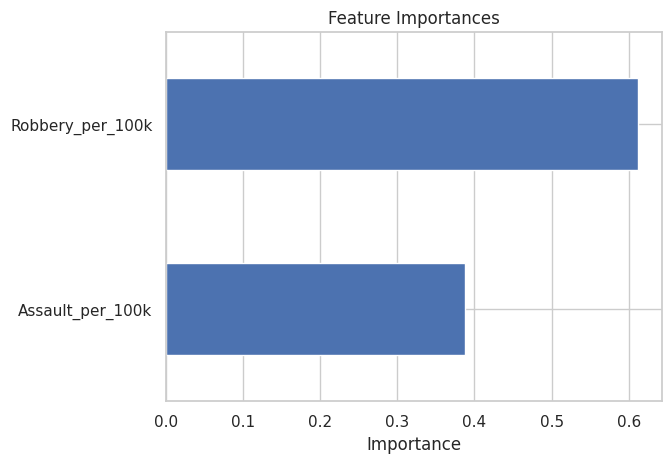

In [8]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', title='Feature Importances')
plt.xlabel('Importance')
plt.show()

## 🧠 What Does Feature Importance Mean?

The bar chart above shows how much each input variable (feature) contributes to predicting the average Airbnb price, according to the Random Forest model.

- **Higher values** indicate features that the model relied on more heavily to make decisions.
- **Lower values** suggest less influence on the final prediction.

For example:
- If `Assault_per_100k` has higher importance than `Robbery_per_100k`, it means that Airbnb prices tend to vary more consistently with assault rates than robbery rates — at least according to the model.

🔍 **Note**: These importances are based on how much each feature reduces prediction error across all decision trees in the forest.
